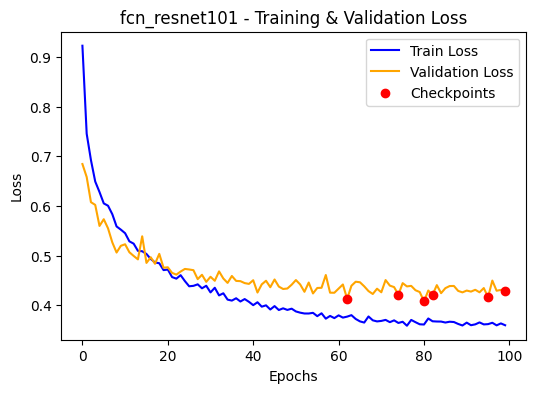

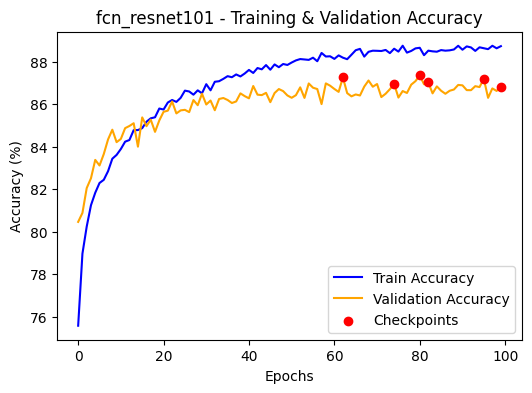

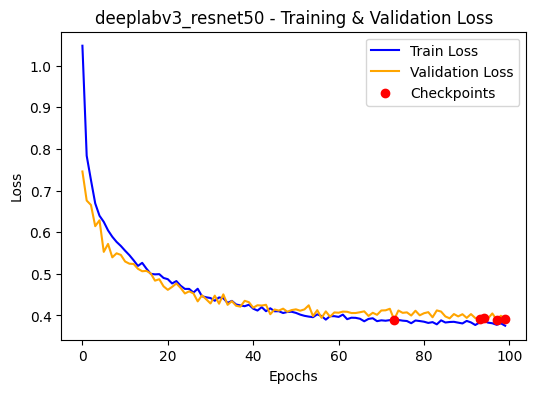

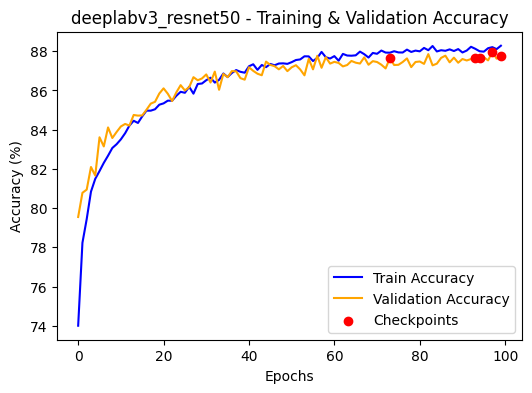

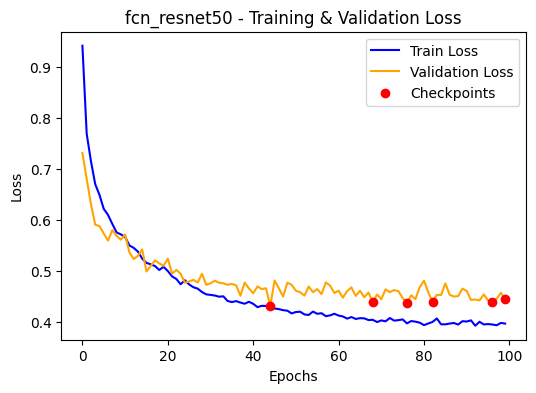

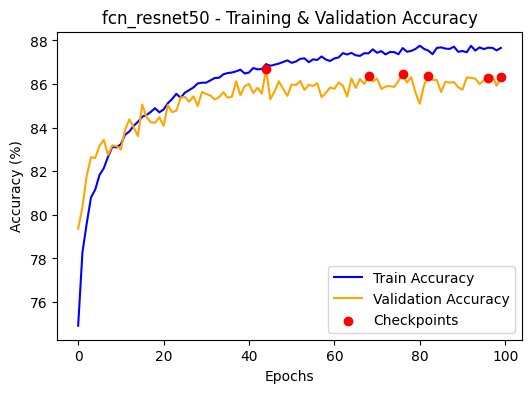

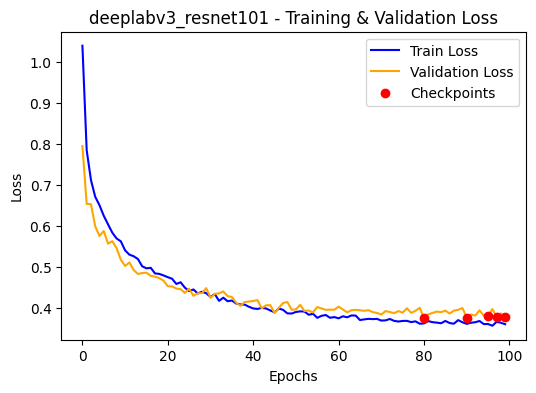

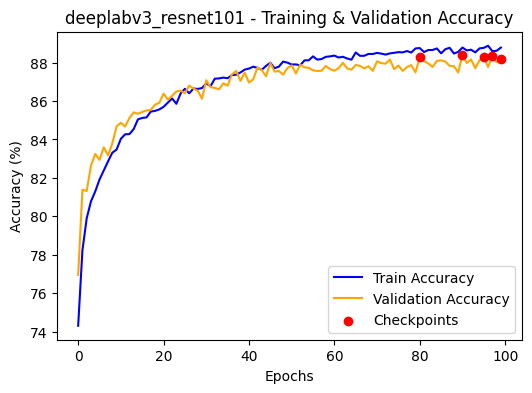

In [4]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

def find_all_models(base_path):
    """ Sucht alle Modellverzeichnisse im Basisordner """
    return [os.path.join(base_path, model) for model in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, model))]

def find_result_json(model_path):
    """ Durchsucht alle Unterordner eines Modells nach einer 'result.json'-Datei """
    for root, dirs, files in os.walk(model_path):
        if "result.json" in files:
            return os.path.join(root, "result.json"), root  # Rückgabe des Pfads und des Modells
    return None, None

def extract_model_name(model_path):
    """ Extrahiert den Modellnamen aus dem Pfad """
    return os.path.basename(model_path)

def parse_json_results(json_path):
    """ Liest und verarbeitet die Trainingsdaten aus der JSON-Datei """
    with open(json_path, 'r') as f:
        lines = f.readlines()
    
    # JSON Zeilen parsen
    results = [json.loads(line) for line in lines]
    
    # Extrahiere relevante Metriken
    epochs = [r["training_iteration"] for r in results]
    train_loss = [r["loss"] for r in results]
    val_loss = [r["val_loss"] for r in results]
    train_acc = [r["train_acc"] for r in results]
    val_acc = [r["val_acc"] for r in results]
    
    return epochs, train_loss, val_loss, train_acc, val_acc

def find_checkpoint_epochs(model_path):
    """ Sucht nach Checkpoint-Ordnern und extrahiert deren Epochennummern """
    checkpoint_epochs = []
    for root, dirs, files in os.walk(model_path):
        for dir_name in dirs:
            if dir_name.startswith("checkpoint_"):
                epoch_num = int(dir_name.split("_")[1])
                checkpoint_epochs.append(epoch_num)
    return sorted(checkpoint_epochs)

def plot_training_results(base_path):
    """ Plottet den Trainingsverlauf für alle Modelle im Basisverzeichnis """
    models = find_all_models(base_path)
    
    for model_path in models:
        json_path, result_path = find_result_json(model_path)
        if not json_path:
            print(f"Keine result.json für {extract_model_name(model_path)} gefunden.")
            continue
        
        model_name = extract_model_name(model_path)
        epochs, train_loss, val_loss, train_acc, val_acc = parse_json_results(json_path)
        checkpoint_epochs = find_checkpoint_epochs(model_path)
        
        # Loss-Diagramm
        plt.figure(figsize=(6, 4))
        plt.plot(epochs, train_loss, label="Train Loss", color='blue')
        plt.plot(epochs, val_loss, label="Validation Loss", color='orange')
        plt.scatter(checkpoint_epochs, [val_loss[e] for e in checkpoint_epochs if e < len(val_loss)], color='red', label="Checkpoints", zorder=3)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title(f"{model_name} - Training & Validation Loss")
        plt.legend()
        plt.show()

        # Accuracy-Diagramm
        plt.figure(figsize=(6, 4))
        plt.plot(epochs, train_acc, label="Train Accuracy", color='blue')
        plt.plot(epochs, val_acc, label="Validation Accuracy", color='orange')
        plt.scatter(checkpoint_epochs, [val_acc[e] for e in checkpoint_epochs if e < len(val_acc)], color='red', label="Checkpoints", zorder=3)
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy (%)")
        plt.title(f"{model_name} - Training & Validation Accuracy")
        plt.legend()
        plt.show()

# Beispielaufruf: Basisverzeichnis übergeben
base_path = "HyperparameterLOG_small"
plot_training_results(base_path)
